# Loan Prediction Analysis

* Problem Statement : Loan Prediction Analysis problem

* Why this problem :  loan prediction is a problem with real-world implications for both financial institutions and borrowers. Using data and machine learning to make informed lending decisions has the potential to improve financial stability, fairness, and customer satisfaction in the lending industry.

* Solution : Creating a solution for the loan prediction problem involves several steps which involves

      A) Data Collection and Understanding

      B) Data Preprocessing

      C) Feature Selection/Engineering

      D) Data Splitting

E) Model Selection and Model Training

* Model's Applying and There Acuuracy and Avg val score: 
     
     A) LogisticRegression :   Accuracy is 0.7927927927927928
                             
                     Avg cross val score is 0.7938902538902539
     
     
     B) Support Vector Machine(SVM):  Accuracy is 0.6936936936936937
     
                              Avg cross val score is 0.7052416052416053
                
     
     C) DecisionTreeClassifier : Accuracy is 0.7297297297297297

                        Avg cross val score is 0.6962325962325963
     
     
     D) RandomForestClassifier : Accuracy is 0.7747747747747747

                          Avg cross val score is 0.7884848484848483
     
     
     E) GradientBoostingClassifier : Accuracy is 0.7927927927927928

                            Avg cross val score is 0.7667321867321868
                            
 
  # Conclusion : Logistic regression is the best model for loan_Prediction analysis

In [1]:
# Importing Numpy and Pandas
import numpy as np  
import pandas as pd

# Importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Importing StandardScaler 
from sklearn.preprocessing import StandardScaler

# Importing train_test_split,cross_val_score and accuracy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

# Importing Machine learning model's
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

# Importing Warnings
import warnings
warnings.filterwarnings("ignore")

# Opening file

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 614
No. of columns : 13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 object type columns in our dataset.

** Missing Values **

Gender column has 13 missing values.

Married column has 3 missing values.

Dependents column has 15 missing values.

Self_Employed column has 32 missing values.

LoanAmount column has 22 missing values.

Loan_Amount_Term column has 14 missing values.

Credit_History column has 50 missing values.

<Axes: >

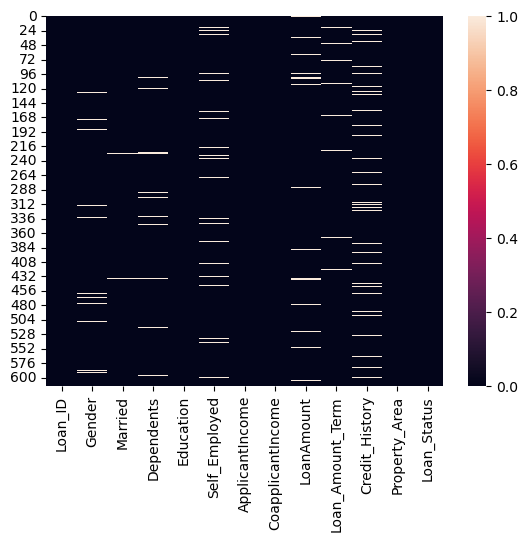

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Handling missing value


Dropping LoanID column as it does not provide as information

In [9]:
df=df.drop("Loan_ID",axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#  Dropping rows of columns under 5 % missing values

In [10]:
columns=["Gender","Dependents","LoanAmount","Loan_Amount_Term"]

In [11]:
df=df.dropna(subset=columns)

In [12]:
df.isnull().sum()*100/len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Filling other 2 columns  with mode as they are catagorical

In [13]:
m=df["Self_Employed"].mode()[0]
m

'No'

In [14]:
df["Self_Employed"]=df["Self_Employed"].fillna(m)

In [15]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [16]:
n=df["Credit_History"].mode()[0]
n

1.0

In [17]:
df["Credit_History"]=df["Credit_History"].fillna(n)

In [18]:
df.isnull().sum()*100/len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# Handling catagorical columns

In [19]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,Male,Yes,2,Graduate,Yes,9323,7873.000000,380.0,300.0,1.0,Rural,Y
249,Male,Yes,0,Graduate,No,1809,1868.000000,90.0,360.0,1.0,Urban,Y
583,Male,Yes,1,Graduate,No,1880,0.000000,61.0,360.0,1.0,Rural,N
311,Male,No,0,Not Graduate,No,2927,2405.000000,111.0,360.0,1.0,Semiurban,Y
282,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y
162,Male,Yes,1,Graduate,No,3089,1280.000000,121.0,360.0,0.0,Semiurban,N
499,Male,No,0,Graduate,No,6283,4416.000000,209.0,360.0,0.0,Rural,N
561,Female,Yes,1,Graduate,Yes,19484,0.000000,600.0,360.0,1.0,Semiurban,Y
177,Male,Yes,3+,Graduate,No,5516,11300.000000,495.0,360.0,0.0,Semiurban,N
381,Male,No,0,Graduate,No,5941,4232.000000,296.0,360.0,1.0,Semiurban,Y


In [20]:
df["Dependents"]=df["Dependents"].replace(to_replace="3+",value="4")

In [21]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
556,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,Y
504,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,1.0,Rural,Y
294,Male,Yes,0,Graduate,No,2383,3334.0,172.0,360.0,1.0,Semiurban,Y
204,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
144,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
366,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
70,Male,Yes,0,Graduate,No,3208,3066.0,172.0,360.0,1.0,Urban,Y


# Converting catagorical data to 0 and 1 and converting the type of column from object to int

In [22]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0}).astype("int")
df["Married"]=df["Married"].map({"Yes":1,"No":0}).astype("int")
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
df["Property_Area"]=df["Property_Area"].map({"Rural":0,"Urban":1,"Semiurban":2}).astype("int")
df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0}).astype("int")

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


<Axes: xlabel='LoanAmount'>

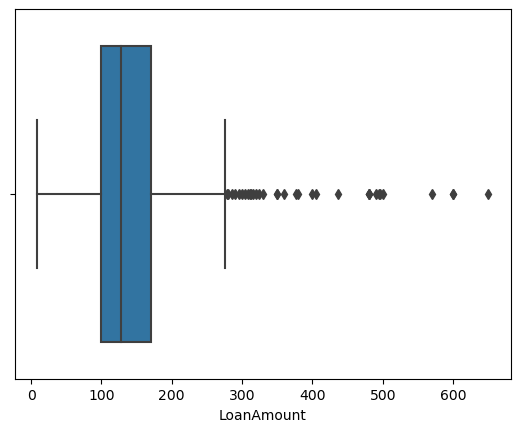

In [25]:
sns.boxplot(data=df,x="LoanAmount")

<Axes: xlabel='ApplicantIncome'>

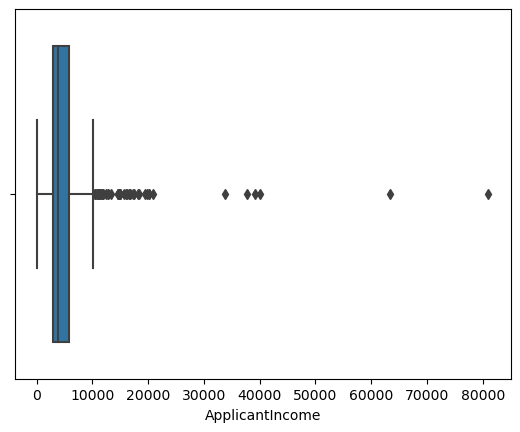

In [26]:
sns.boxplot(data=df,x="ApplicantIncome")

<Axes: ylabel='Loan_Status'>

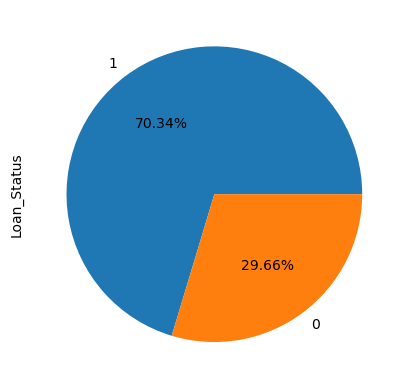

In [27]:
df['Loan_Status'].value_counts().plot(kind="pie",autopct="%.2f%%")

68.73% People's status is Yes 

          while 

31.27% People's status is No

<Axes: ylabel='Self_Employed'>

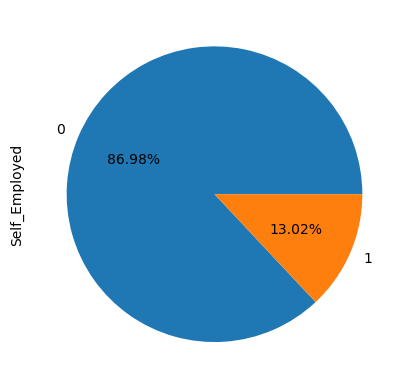

In [28]:
df['Self_Employed'].value_counts().plot(kind="pie",autopct="%.2f%%")

Only 14.09% People are Self_Employed
          
          While
85.91% People are No Employed              

<Axes: ylabel='Gender'>

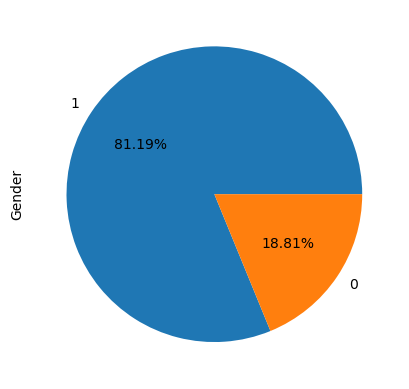

In [29]:
df['Gender'].value_counts().plot(kind="pie",autopct="%.2f%%")

81.36% Applicants are Male
   
           and
Only 18.64% Applicants are Female

# Feature and target

In [30]:
X=df.drop("Loan_Status",axis=1)

In [31]:
Y=df["Loan_Status"]

# Feature scaling

In [32]:
cols=["ApplicantIncome","ApplicantIncome","ApplicantIncome","Loan_Amount_Term"]

# Importing StandardScaler

In [33]:
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])

# Splitting the data into training , testing and  applying K-fold cross validation

# Importing train_test_split
# Importing cross_val_score
# Importing accuracy_score 

In [34]:
model_df={}
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(Y_test,Y_pred)}")
    
    score=cross_val_score(model,X,Y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)



# Importing logistic regression

In [35]:
model=LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy is 0.7927927927927928
LogisticRegression() Avg cross val score is 0.7938902538902539


# Importing Support Vector Machine(SVM)

In [36]:
model=svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.6936936936936937
SVC() Avg cross val score is 0.7052416052416053


# Importing decision tree classifier

In [37]:
model=DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.7297297297297297
DecisionTreeClassifier() Avg cross val score is 0.6962325962325963


# Importing Random forest classifier 

In [38]:
model=RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7884848484848483


# Importing Gradient Boosting classifier

In [39]:
model=GradientBoostingClassifier()
model_val(model,X,Y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7667321867321868


# Checking Score of all model's

In [40]:
model_df

{LogisticRegression(): 79.39,
 SVC(): 70.52,
 DecisionTreeClassifier(): 69.62,
 RandomForestClassifier(): 78.85,
 GradientBoostingClassifier(): 76.67}

# Our best model is Logistic Regression